In [93]:
import numpy as np
import math
import sys
import time
import random
import matplotlib.pyplot as plt

class SAnnealing(object):

    def __init__(self, step = 1, final_temperature=0.1, temperature = 100, alpha=0.95, equilibrium=10, time = 0, pesos = [], valores = [], capacity = 1):
        self.step = step
        self.temperature = temperature
        self.final_temperature = final_temperature
        self.alpha = alpha
        self.equilibrium = equilibrium
        self.time = time
        self.pesos = pesos
        self.valores = valores
        self.capacity = capacity


    def cost_function(self, f, x):
        return f(self.valores, x)

    def getTotalPeso(self, pesos: list, actual_solution: list) -> float:
        totalPeso = 0
        i = 0
        for element in actual_solution:
            if(element):
                totalPeso += pesos[i]
            i += 1
        return totalPeso 

    def create_first_solution(self) -> list:
        while(1): 
            firstSolution = []
            for i in np.arange(len(self.pesos)):
                firstSolution.append(random.randint(0,1))
            if(self.getTotalPeso(self.pesos, firstSolution) <= self.capacity):
                return firstSolution


    def create_neighbor_solution(self, actual_solution: list) -> list:
        while(1):
            neighbor = actual_solution.copy()
            randomIndex = random.randint(0,(len(actual_solution) - 1))
            neighbor[randomIndex] = 0 if neighbor[randomIndex] == 1 else 1
            if(self.getTotalPeso(self.pesos,neighbor) <= self.capacity):
                return neighbor


    def aceptance_probability(self, deltaE, temperature):
        try:
            r = math.exp(-deltaE/temperature)
        except OverflowError:
            r = float("inf") 
        return r


    def update_temperature(self, temperature):
        return self.alpha * temperature


    def fit(self, objetive):
        self.cost_ = []
        actual_solution = self.create_first_solution()
        best_solution = actual_solution.copy()
        epoch = 0
        number_tested_solution = 0
        aceptanced = 100
        while (self.temperature > self.final_temperature):
            
            number_worst_solution_acepted = 0
            i = 0
            while (i < self.equilibrium):
                random_solution = self.create_neighbor_solution(actual_solution)
                number_tested_solution += 1
                delta_E = self.cost_function(objetive, random_solution) - self.cost_function(objetive, actual_solution)
                if delta_E > 0:
                    actual_solution = random_solution.copy()
                else:
                    deg_deltaE = self.aceptance_probability(-delta_E, self.temperature)
                    if(np.random.uniform(0, 1) < deg_deltaE):
                        actual_solution = random_solution.copy()
                        number_worst_solution_acepted += 1
                x = self.cost_function(objetive, actual_solution)
                self.cost_.append((x,1))
                epoch_strlen = len(str(epoch))
                sys.stderr.write('\r%0*d Epoch | Equilibrium %d | Temperature %.2f '
                                '| Cost function: %.2f | Aceptance : %.2f' 
                        %
                        (epoch_strlen, epoch+1, i+1, self.temperature, 
                        x, aceptanced ))
                time.sleep(self.time)
                sys.stderr.flush()
                i += 1
                epoch += 1
            aceptanced = number_worst_solution_acepted * 100 /number_tested_solution
            self.temperature = self.update_temperature(self.temperature)
        print(actual_solution)
            

In [102]:
import csv

pesos = []
with open('./data/p20.csv', 'r', newline='') as file:
  myreader = csv.reader(file, delimiter=',')
  for rows in myreader:
   pesos.append(rows)
pesos = np.array(pesos).astype("float")

valores = []
with open('./data/v20.csv', 'r', newline='') as file:
  myreader = csv.reader(file, delimiter=',')
  for rows in myreader:
   valores.append(rows)
valores = np.array(valores).astype("float")

capacidad = 50

def getTotalValor(valores: list, actual_solution: list) -> float:
    totalValor = 0
    i = 0
    for element in actual_solution:
        if(element):
            totalValor += float(valores[i])
        i += 1
    return totalValor

In [103]:
sa = SAnnealing(step = 1, final_temperature=0.1, temperature = 100000, alpha=0.95, equilibrium=30, time = 0, pesos=pesos, valores=valores, capacity=capacidad)
sa.fit(getTotalValor)

8100 Epoch | Equilibrium 30 | Temperature 0.10 | Cost function: 143.00 | Aceptance : 0.0065690

[0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]


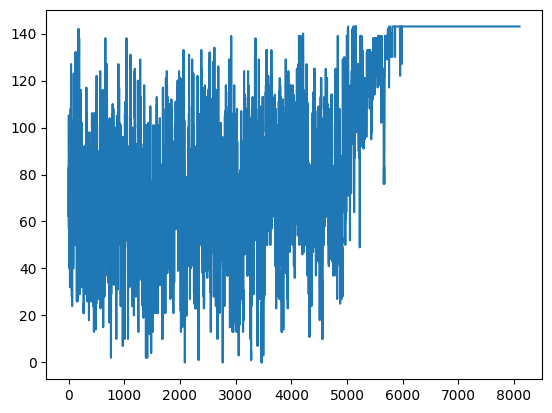

In [104]:
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()